In [1]:
%matplotlib inline

In [2]:
cd /home/safaai/yann/neural_network_dynamics/cells/

[Errno 2] No such file or directory: '/home/safaai/yann/neural_network_dynamics/cells/'
/Users/yzerlaut/work/neural_network_dynamics/projects/biophys_awareness


In [3]:
%run cell_construct.py -n EIF -c 'r' --save '../projects/biophys_awareness/data/inh_cell.svg' --amp 250
plt.show()

ERROR: File `'cell_construct.py'` not found.



This file construct the equations for brian2

/!\ cell parameters --NOT-- in SI units /!\ 


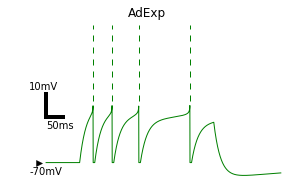

In [40]:
%run cell_construct.py -n AdExp -c 'g' --save '../projects/biophys_awareness/data/exc_cell.svg' --amp 250
plt.show()

In [41]:
cd /home/safaai/yann/neural_network_dynamics/projects/biophys_awareness/

/home/safaai/yann/neural_network_dynamics/projects/biophys_awareness


In [44]:
%run raster --Qe 1. --Qi 4. --Qe_ff 2. --fext 3.23

ImportError: No module named 'common_libraries.data_analysis'

In [4]:
%run contrib_of_single_spike.py --NRNe LIF_Vreset_-60 --NRNi LIF_Vreset_-60 --NTWK Vogels-Abbott --fext_stat 0. --tstop 1000.

synaptic network parameters --NOT-- in SI units
Vreset  changed to -->  -60.0
/!\ cell parameters --NOT-- in SI units /!\ 
Vreset  changed to -->  -60.0
/!\ cell parameters --NOT-- in SI units /!\ 
Vreset  changed to -->  -60.0
Vreset  changed to -->  -60.0
